In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [69]:
df = pd.read_csv("energydata_complete.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [70]:
df.shape

(19735, 29)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [72]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [73]:
feature1 = df[['T2']]
target1 = df[["T6"]]

<AxesSubplot:xlabel='T2', ylabel='T6'>

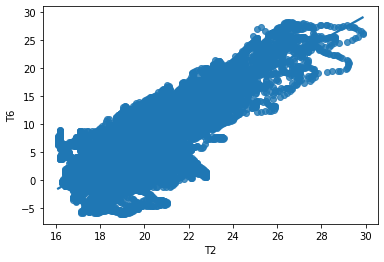

In [74]:
sns.regplot(x="T2", y="T6",
data=df)

In [75]:
# Splitting data and training linear regression model
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(feature1, target1, test_size = 0.3, random_state = 42)
linear_model = LinearRegression()
linear_model.fit(x_train_1, y_train_1)
prediction_values = linear_model.predict(x_test_1)

In [76]:
rmse = np.sqrt(mean_squared_error(y_test_1, prediction_values))
rmse

3.630315129680444

Remove the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). Normalize the dataset using the MinMaxScaler (Hint: Use the MinMaxScaler fit_transform and transform methods on the train and test set respectively). Run a multiple linear regression using the training set. Answer the following questions:

What is the Mean Absolute Error (in three decimal places) for the  training set?

In [77]:
# Feature Scaling and Splitting data
modified_df = df.drop(columns=['date', 'lights'])

features_df = modified_df.drop(columns=['Appliances'])
target_df = modified_df[['Appliances']]
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state = 42)

scaler = MinMaxScaler()
normalized_x_train = scaler.fit_transform(x_train)
normalized_x_test = scaler.transform(x_test)

In [78]:
# Model training
model = LinearRegression()
model.fit(normalized_x_train, y_train)
predicted_values = model.predict(normalized_x_test)

What is the Mean Absolute Error (in three decimal places) for test set?

In [79]:
# Calculating mean absolute error
mae = mean_absolute_error(y_test, predicted_values)
round(mae,3)

53.643

What is the Root Mean Squared Error (in three decimal places) for test set?

In [80]:
# Calculating root mean squared error
rmse_1 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse_1,3)

93.64

Train a ridge regression model with default parameters. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [81]:
# Training a ridge regression model
ridge_reg = Ridge()
ridge_reg.fit(normalized_x_train, y_train)

Ridge()

In [82]:
ridge_predicted_values = ridge_reg.predict(normalized_x_test)
rmse_2= np.sqrt(mean_squared_error(y_test, ridge_predicted_values))
round(rmse_2, 3)

93.709

Yes. There is a change in the root mean square error on the test set.

Train a lasso regression model with default value and obtain the new feature weights with it. 

In [83]:
# Training a lasso regression model
lasso_reg = Lasso()
lasso_reg.fit(normalized_x_train, y_train)


Lasso()

How many of the features have non-zero feature weights?

In [84]:
# Counting non-zero values
lasso_weights = lasso_reg.coef_
non_zero_weights = np.count_nonzero(lasso_weights)
non_zero_weights

4

What is the new RMSE with the Lasso Regression on the test set? 

In [85]:
lasso_predicted_values = lasso_reg.predict(normalized_x_test)
rmse_2= np.sqrt(mean_squared_error(y_test, lasso_predicted_values))
rmse_2

99.42422892589771